# Assignment 02
The following assignment is a step-by-step process to implement a multiclass classification using Iris dataset.

**Note:**

- Please note that every question has 0.5 and it provides five out of total ten marks for the assignment. 5/10%

The video presentation 5/10%.

Without YouTube presentation you receive no mark for the submission.


In [1]:
#00 The iris.csv file (Iris dataset) is located in the Assignment folder below the current ipynb file.

 **Important Note:** We are NOT allowed to import the dataset from Keras. We need to upload the provided iris.csv file to colab from our Google Drive.

In [2]:
# Created by Adam Simcoe - 101442161
# Last Updated February 26th, 2025

# Imports

import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [3]:
#00 1st, upload the iris.csv into your Google Drive (your Colab folder).

In [4]:
# Mount google drive to access the iris.csv file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#01-a Find the path of iris.csv file, and save it in a variable called fileName.

In [6]:
# Save file path of iris.csv file
fileName = '/content/drive/MyDrive/COMP 3132 - Assignment 2/Assignment_02_iris.csv'

In [7]:
#01-b Read the content of the iris.csv file and save it in a variable, named iris.

In [8]:
# use pandas to read the csv file
iris = pd.read_csv(fileName)

In [9]:
#01-c Show the first 5 rows of the dataframe.

In [10]:
# First 5 rows of dataset
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


As you see, the last column contains strings. We want to convert these strings to integers,  and we can work with them easily in our Neural Network model.

setosa -> 0

versicolor -> 1

virginica -> 2

In [11]:
#2-a Convert the last column strings to integers, as
# setosa -> 0
# versicolor -> 1
# virginica -> 2

In [12]:
# Specifies numerical equivalents to each string value present in the species column
iris_species_map = {
    'setosa': 0,
    'versicolor': 1,
    'virginica': 2
}

In [13]:
# Maps the species column with iris_species_map, converting all string values to their numerical equivs
iris['species'] = iris['species'].map(iris_species_map)

In [14]:
#2-b Now, check the first 5 elements of the iris dataset once again:

In [15]:
# First 5 rows of dataset to verify species column change
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
#03-a Select the first four columns of the dataframe as the Data and call the data x.

In [17]:
# Set the first four columns as x
x = iris.iloc[:, :4]

# First 5 rows to verify
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
#03-b Select the last column as the label and call it y.

In [19]:
# Sets last column as the y label
y = iris.iloc[:, -1]

# first 5 rows to verify
y.head()

,species
0,0
1,0
2,0
3,0
4,0


In [20]:
#04 Now, it is the time to split the data (x) and the label (y) into training and testin segments,
#   and call them parts x_train,x_test,y_train,y_test.

In [21]:
#04-a Split the data, and label ito training and testing segments, while the size of test data is 20%,
#     and use randome_state = 123 to make all the answers similar in the whole class.

In [22]:
# Split data into training and testing splits, set test data size to 20% and random state to 123
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [23]:
#04-b Check the first five rows of  x_train,x_test,y_train,y_test.

In [24]:
# First 5 rows of x_train
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
130,7.4,2.8,6.1,1.9
119,6.0,2.2,5.0,1.5
29,4.7,3.2,1.6,0.2
0,5.1,3.5,1.4,0.2
62,6.0,2.2,4.0,1.0


In [25]:
# First 5 rows of y_train
y_train.head()

,species
130,2
119,2
29,0
0,0
62,1


In [26]:
# First 5 rows of x_test
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
72,6.3,2.5,4.9,1.5
112,6.8,3.0,5.5,2.1
132,6.4,2.8,5.6,2.2
88,5.6,3.0,4.1,1.3
37,4.9,3.1,1.5,0.1


In [27]:
# First 5 rows of y_test
y_test.head()

,species
72,1
112,2
132,2
88,1
37,0


In [28]:
#04-c Check the length of the x_train and x_test. If the numbers are 120 & 30, AWESOME!
#     You are good to continue!

In [29]:
# Print the length of x_train to verify
print("x_train length:", len(x_train))

x_train length: 120


In [30]:
# Print the length of x_test to verify
print("x_test length:", len(x_test))

x_test length: 30


In [31]:
#05-a Convert y_train and y_test from categorical to one-hot encoded values, and call them
#     one_hot_train_labels, and one_hot_test_labels, respectively.

In [32]:
# Convert our train and test labels to one hot encoded values
one_hot_train_labels = to_categorical(y_train, num_classes=3)
one_hot_test_labels = to_categorical(y_test, num_classes=3)

In [33]:
#06-a Define a sequential model that contains 3 dense layers.
#     In the first and second layers, use 100 hidden units (neurons) and a 'relu' activation function.
#     For the last layer, we need to use 3 as the number of output,
#     and the reason is we have three classes (setosa -> 0, versicolor -> 1, virginica -> 2)
#     Also, please pick an appropriate loss function for the last layer.
#     (You may already have guessed what could be the best loss function when we have converted the categorical values to encoded values.)

In [34]:
# Define the model using 3 layers
model = keras.Sequential([
    layers.Dense(100, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(3, activation="softmax")
])

In [35]:
#06-b Now, compile your model using the 'rmsprop' optimizer, an appropriate loss function, and 'accuracy' for your metrics.

In [36]:
# Compile the model
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [37]:
#07-a Train your model using epoch=20, batch=10.

In [38]:
# Train the model with epochs set to 20 and the batch size set to 10
train_history = model.fit(
    x_train,
    one_hot_train_labels,
    epochs=20,
    batch_size=10)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4157 - loss: 1.0623
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7777 - loss: 0.7285  
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7769 - loss: 0.6250 
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8636 - loss: 0.5497 
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9101 - loss: 0.4685 
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9353 - loss: 0.3997 
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8765 - loss: 0.3244 
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8775 - loss: 0.3428 
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9737 - loss: 0.2617 
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9560 - loss: 0.2713 
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9396 - loss: 0.2288 
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 

In [39]:
#08-a Calculate the result, evaluating x_test and one_hot_test_label, and report on the accuracy of your model.

In [40]:
# Evaluate the model's accuracy and loss and store them
loss_result, accuracy_result = model.evaluate(x_test, one_hot_test_labels)

# Print the loss and accuracy of the model
print("Test Loss:", loss_result)
print("Test Accuracy:", accuracy_result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 735ms/step - accuracy: 0.9667 - loss: 0.1634
Test Loss: 0.1634429544210434
Test Accuracy: 0.9666666388511658


In [41]:
#09-a Now, we repeat all we have done in #06-a with the following parameters:
#     In the first and second hidden layers, use 10 hidden units (neurons) and a 'relu' activation function.
#     For the output layer, we need to use 3.

In [42]:
# Define Model B with 3 layers, 2 with 100 hidden units and 1 with 3
modelB = keras.Sequential([
    layers.Dense(10, activation="relu"),
    layers.Dense(10, activation="relu"),
    layers.Dense(3, activation="softmax")
])

In [43]:
#09-b Use the same settings as for #06-b (compile using the same optimizer, loss function) and output the accuracy

In [44]:
# Compile Model B
modelB.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [45]:
#09-c Please fit your model using epoch=4, batch=10.

In [46]:
# Train model B with epochs set to 4 and batch size to 10
train_historyB = modelB.fit(
    x_train,
    one_hot_train_labels,
    epochs=4,
    batch_size=10)

Epoch 1/4
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2795 - loss: 1.3874
Epoch 2/4
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3791 - loss: 0.9801  
Epoch 3/4
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6124 - loss: 0.8692 
Epoch 4/4
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6548 - loss: 0.7481 


In [47]:
#09-d Calculate the result, evaluating x_test and one_hot_test_label, and report on the accuracy of your model.

In [48]:
# Evaluate the model's accuracy and loss and store them
loss_resultB, accuracy_resultB = modelB.evaluate(x_test, one_hot_test_labels)

# Print Model B's accuracy and loss
print("Model B Test Loss:", loss_resultB)
print("Model B Test Accuracy:", accuracy_resultB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step - accuracy: 0.8000 - loss: 0.5522
Model B Test Loss: 0.552172064781189
Model B Test Accuracy: 0.800000011920929


In [49]:
#10-a In your video submission, explain each line of your code, and the arguments you've used
# Ensure to answer the following questions at a minimum:
# 10-a-i) How the number of layers or hidden units could impact the accuracy of our model.
# 10-a-ii) Do we always suffer from overfitting?
# 10-a-iii) How can we detect overfitting?
# 10-a-iv) How can we reduce overfitting?

In [50]:
#10-b
# Use different settings than the ones we chose in #09
# Change each of the following once:
#   i)   optimizer
#   ii)  number of layers
#   iii) hidden units
#   iv)  number of epochs
#   v)   batch_size
# Change one parameter at a time, and rerun the cell(s), then explain the output

In [51]:
# Arrays to store the accuracy and loss for each setting change so we can compare later
accuracy_results = []
loss_results = []
different_settings = [
    "Base Model B", "Optimizer Change", "Layers Change", "Hidden Units Change",
    "Epochs Change", "Batch Size Change"
]

# For reference, the following changes will be made:
# Optimizer - rmsprop to adam
# Layers - 1 additional layer of 10 hidden units
# Hidden units - increasedfrom 10 to 64 for 2 layers
# Epochs - increased from 4 to 8
# Batch size - increased from 10 to 20

In [72]:
# Model for checking different settings
modelC = keras.Sequential([
    layers.Dense(10, activation="relu"),
    layers.Dense(10, activation="relu"),
    #layers.Dense(10, activation="relu"), # Uncomment to add extra layer
    layers.Dense(3, activation="softmax")
])

In [73]:
# Compile the model with different settings
modelC.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [74]:
# fit the model with our different epoch and batch sizes
train_historyC = modelC.fit(
    x_train,
    one_hot_train_labels,
    epochs=4,
    batch_size=20)

Epoch 1/4
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3481 - loss: 5.3151
Epoch 2/4
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3426 - loss: 4.4916 
Epoch 3/4
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3718 - loss: 3.7944 
Epoch 4/4
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4067 - loss: 3.1580 


In [75]:
# Check to see how accuracy and loss is affected by changing different settings
loss_resultC, accuracy_resultC = modelC.evaluate(x_test, one_hot_test_labels)

print("Model C Test Loss:", loss_resultC)
print("Model C Test Accuracy:", accuracy_resultC)

# Append our arrays with the new accuracy and loss
accuracy_results.append(accuracy_resultC * 100)
loss_results.append(loss_resultC * 100)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - accuracy: 0.2000 - loss: 3.9006
Model C Test Loss: 3.9006357192993164
Model C Test Accuracy: 0.20000000298023224


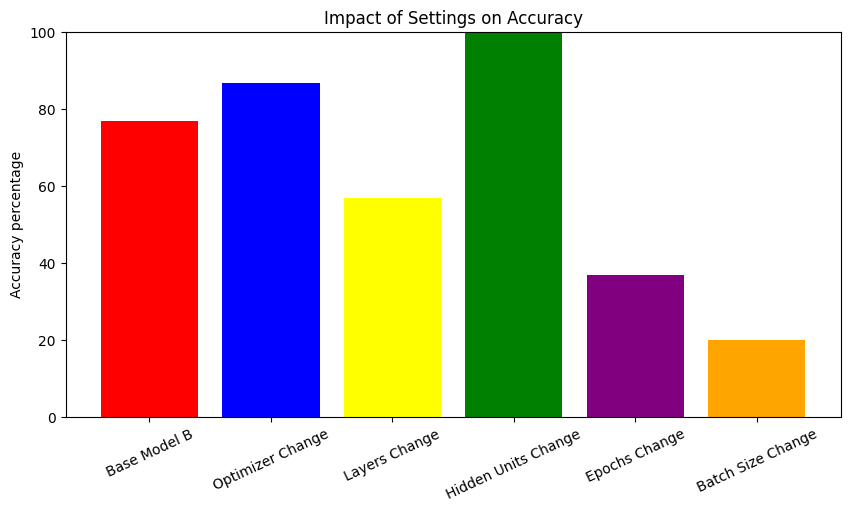

Base Model: 76.66666507720947, Optimizer Change: 86.66666746139526, Layers Change: 56.66666626930237, Hidden Units Change: 100.0, Epochs Change: 36.666667461395264, Batch Size Change: 20.000000298023224


In [79]:
# Bar Graph for comparing settings effects on Model accuracy
# Run only after doing all 5 param changes + base model
plt.figure(figsize=(10, 5))
plt.bar(different_settings, accuracy_results, color=['red', 'blue', 'yellow', 'green', 'purple', 'orange'])
plt.ylim(0, 100)
plt.ylabel('Accuracy percentage')
plt.title('Impact of Settings on Accuracy')
plt.xticks(rotation=25)
plt.show()

# Print the exact accuracy percentages
print(f"Base Model: {accuracy_results[0]}, Optimizer Change: {accuracy_results[1]}, "
      f"Layers Change: {accuracy_results[2]}, Hidden Units Change: {accuracy_results[3]}, "
      f"Epochs Change: {accuracy_results[4]}, Batch Size Change: {accuracy_results[5]}")

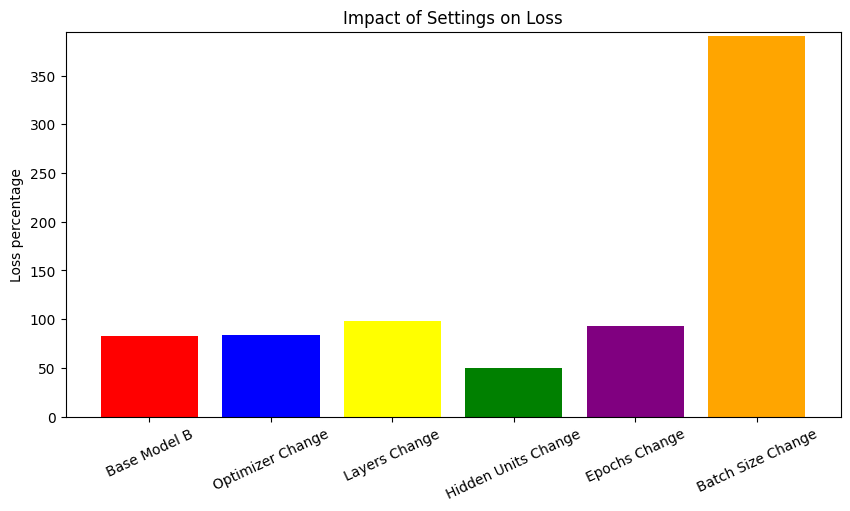

Base Model: 82.76622891426086, Optimizer Change: 83.39025974273682, Layers Change: 97.96850681304932, Hidden Units Change: 49.663254618644714, Epochs Change: 92.72701144218445, Batch Size Change: 390.06357192993164


In [80]:
# Bar Graph for comparing settings effects on Model Loss
# Run only after doing all 5 param changes + base model

plt.figure(figsize=(10, 5))
plt.bar(different_settings, loss_results, color=['red', 'blue', 'yellow', 'green', 'purple', 'orange'])
plt.ylim(0, max(loss_results) + 5)
plt.ylabel('Loss percentage')
plt.title('Impact of Settings on Loss')
plt.xticks(rotation=25)
plt.show()

# Print the exact loss percentages
print(f"Base Model: {loss_results[0]}, Optimizer Change: {loss_results[1]}, "
      f"Layers Change: {loss_results[2]}, Hidden Units Change: {loss_results[3]}, "
      f"Epochs Change: {loss_results[4]}, Batch Size Change: {loss_results[5]}")

---
# Deliverables:
1. Submit the current ipynb file on D2L
2. Please record and upload to YouTube 3-6 minute recorded video clip (aim for 5 minutes) describing the answers to the questions above, espcially #10.

Notes:
- In your submission, YOU MUST SUBMIT A LINK TO YOUR YOUTUBE VIDEO as a TEXT SUBMISSION SECTION on your D2L submission.
- Omitting this D2L comment will result in a 0% for your total mark.